# Statistics, so you can (hopefully) have fun in FML

The goal of this document is to help you get comfortable with some of the fundamental math and statistics concepts we’ve touched on in the lectures. Understanding these will make it easier to follow along with the machine learning topics we’re covering and, hopefully, give you the tools to start seeing some cool patterns and insights hidden in the data.

We'll start by covering the concepts in theory and then follow up with practical examples. This approach should help you build a strong intuition for how these ideas work in real-world data. To give you a little tease we will look at the data with statistics from the previous years for this course 🤓.



*NOTE: Everything was written from the top of my head and double checked with the study materials for the statistics from the Ing. Martina Litschmannová, Ph.D. [Study materials from statistics](https://mi21.vsb.cz/sites/mi21.vsb.cz/files/unit/interaktivni_uvod_do_statistiky.pdf)*

### For all my zoomer students

![Haha](https://github.com/lowoncuties/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/subway.gif?raw=true)

## Math and statistics terms 

### Right, right ?

<img src="https://github.com/lowoncuties/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/images/materials_meme2.png
" alt="haha funny" style="width:400px;">


### **Basic concepts**

- **Minimum (Min)**: The smallest value in a dataset. It's simply the lowest observation in your data.
  
- **Maximum (Max)**: The largest value in a dataset. This represents the largest observed data point.

### **Mean and variance**

- **Mean**: The average value of your data. It’s the sum of all values divided by the number of values.

- **Variance**: measure of how spread out the data is around the mean. High variance means the data points are widely dispersed; low variance means they are close to the mean. This is best explained on the example, since its easier to understand it when you have a context. Variance is always in the form of the unit we $measure^2$.

*Remember: If someone is mean it doesn't necessary mean that he is mean*

### **Median** 
Middle value when your data is ordered from smallest to largest. If you have an odd number of data points, the median is the middle one. If you have an even number, the median is the average of the two middle values. 

**Interesting fact** is that the median is often a better measure of "central tendency" than the mean (average), especially in the presence of outliers. 

**Why ?**  Imagine a scenario where you’re looking at the incomes of 10 people, 9 of whom earn around 40,000, but 1 person earns 1,000,000. The mean would be heavily skewed by the millionaire, pulling the average up to a point that doesn’t represent most people's earnings. On the other hand, the median would simply be one of the 40,000 incomes, giving a much clearer picture of what the "typical" person in that group earns. This is why the median often gives a more realistic sense of central tendency when extreme values are present.

### **Quartiles and quantiles**
- **Quartiles**: from the word "Quarter" they divide your data into four equal parts after it has been sorted in ascending order
  - **Q1 (First Quartile)**: The value that marks the first 25% of the data. It’s the point below which 25% of the data lie.
  - **Q2 (Second Quartile/Median)**: The middle value, splitting the data in half. 50% of the values lie below this point.
  - **Q3 (Third Quartile)**: The value that marks the first 75% of the data, meaning 75% of the data points are below this point.

- **Quantiles**: split the data into equal-sized intervals
  - **decile**: divides the data into 10 parts. **Example** 5th decile = Median = Q2, it's basically the representation of the same "chunk" of data 
  - **percentile**: divides it into 100 parts. **Example** 80 percentile value below which 80% of the data points fall. If you think about it the 25 percentile = Q1
  
  


### **Interquartile Range (IQR)**
Difference between the third quartile (Q3) and the first quartile (Q1). It’s a measure of the middle 50% of the data

**Equation:** *IQR = Q3 - Q1*

**Why is it usefull ?** IQR tells us about the spread of the central part of the data, ignoring the extreme values. It’s useful because it is not affected by outliers as much as the range (Min - Max) is.

### **Outliers**
The simplest explanation would be "*The data you love and hate at the same time*"

Data points that are significantly different from the majority of the data. They lie outside of the expected range and can either suggest interesting insights or "mess-up" our results.

**Equation**: Any **data point < Q1 - 1.5 * IQR** OR **data point > Q3 + 1.5 * IQR**

**Example**: Imagine 10 people working a same job, 9 of whom earn around 40,000, but 1 person earns 200,000. This 1 person would probably be an outlier, this can suggest an interesting insight, and we can focus on that one person (we can maybe find out why he has that much, maybe there are some shenanigans going on, etc...everything depends on the quality and quantity of the data)


<img src="https://github.com/lowoncuties/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/images/materials_meme3.png
" alt="haha meme" style="width:400px;">


## Standard Deviation (std)
The standard deviation is a measure of how much individual data points in a dataset deviate (or vary) from the mean. In simpler terms, it tells you how spread out the data is. 

**Interesting fact** is that the **std = $\sqrt{Variance}$**, it basically gives a "unit" to the variance. We can think about it as the value +- from the mean which we can interpret in the human form (**we cannot interpret Variance like this since its $unit^2$**). 

**Example**: We have a std of price = 3000, that means that the spread around the mean is +- 3000, if we have a better insight of the data, we can usually conclude a lot of facts based on the std, like: Market volatility, extreme weather changes, how many students studied for the test, etc. 

It helps in understanding the variability or consistency in the data.


# Practical example

Our focus here, will be on not only using these terms correctly but also on interpreting them in the context of real data.

**My personal opinion of what data analysis is:**

The data analysis is like finding a needle in a haystack, but you know exactly where the needle is. The interesting part here is a relation of the haystack to the needle.

In other words, you'll either be given a specific task or you develop your own hypothesis, which you'll then test by analyzing the data. Your conclusions—whether you accept or reject the hypothesis—are fully supported and validated by the data itself.

**Quick description of the data**

Dataset represents the students of the FML course from the VSB-TUO from the previous years, the columns are as following:
- **Name** - hashed name of the student 
  
- **TasksTotal** - total points for the lecture tasks (0-20 +- some bonus points) where min. to pass this section is 10 points
  
- **EDA_CLU** - points for the 1st project (0 - 45) where min. to pass this section is 20 points
  
- **CLS** - points for the 2nd project (0 - 35) where min. to pass this section is 15 points
  
- **Total** - sum of the points from all sections
  
- **StudyGroup** - program in which students study CS - Computer Science, MAT - Applied Mathematics, CSI - Computer Systems of 21st. Century 



### Import libraries

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

### Load the data

In [7]:
df = pd.read_csv('datasets/fml_data_complete.csv')
df.head()

,Name,TasksTotal,EDA_CLU,CLS,Total,StudyGroup
0,MAT_cyeqiclpnw,27.0,41,33,101.0,MAT
1,CS_scmuhhxvqy,18.0,44,29,96.0,CS
2,CS_qslokhdhdi,14.0,40,30,89.0,CS
3,CS_ejcrszeret,15.5,35,31,84.5,CS
4,CS_lvmnniuecb,20.0,28,22,70.0,CS


### Look at the data types for the columns

It's always good to look at the data types, so we know the kind of data we're working with

In [4]:
df.dtypes

Name           object
TasksTotal    float64
EDA_CLU         int64
CLS             int64
Total         float64
StudyGroup     object
dtype: object

We can see that the majority of data is in numerical form, let's use the function **df.describe()** to get some more insight on these values

In [5]:
df.describe()

,TasksTotal,EDA_CLU,CLS,Total
count,48.000000,48.000000,48.000000,48.000000
mean,16.958333,29.062500,23.479167,70.750000
std,5.960717,13.185108,10.687017,28.050486
min,0.000000,0.000000,0.000000,0.000000
25%,13.500000,24.500000,22.000000,64.750000
50%,15.750000,33.000000,27.000000,77.500000
75%,20.000000,40.000000,30.000000,89.500000
max,29.000000,45.000000,35.000000,106.000000


Here we can express the terms learned earlier on a real values. We know that the numbers are points given for each section.

**What are some observations from the .describe()?** We can use the **TasksTotal** column for instance

- The **total number** of observations is **48**
  
- The **mean value is almost 17**, that means that the **majority of people passed this section**, this is **further supported by the Q1(25%**), which is **13.50**, that means that the **25% of the people had the 13.5 points or less** (you need atleast 10 points to pass), we can interpret this as **more than 75% of the people passed this section.**
  
- The **standard deviation is "pretty low"** as well, we can interpret this as the **average person had 17 +- 6 points** (mean +- std), if we think about this, **the average person passed this section with ease**. If we want to make an **"extreme conclusion"**, we can say something like, **I think that this part can be done with almost no effort** OR **The task are so easy, the average Joe can do them**, etc.

Another interesting observation is that there are both minimum and maximum values in all categories, by looking at this, and the values for Q1 and Q3 (IQR), we can almost certainly tell that there will be some outliers in all of those categories.

Now we can plot this data


<Axes: ylabel='TasksTotal'>

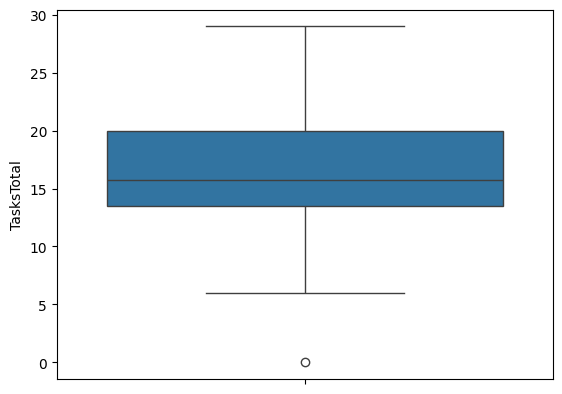

In [19]:
sns.boxplot(data=df, y="TasksTotal")

We can use a barplot to visually represent the insights we've gathered from the data. Presenting the data in a graphical format makes it easier to understand patterns and trends, allowing us to process and interpret the information more quickly than by simply looking at numbers.

***Insert what you see in the plot***

### Plot more 

- try to plot as much data as possible without making the plot non-readable
- Use categorical features as a **hue** to understand how data behave for each subgroup

<Axes: xlabel='StudyGroup', ylabel='Total'>

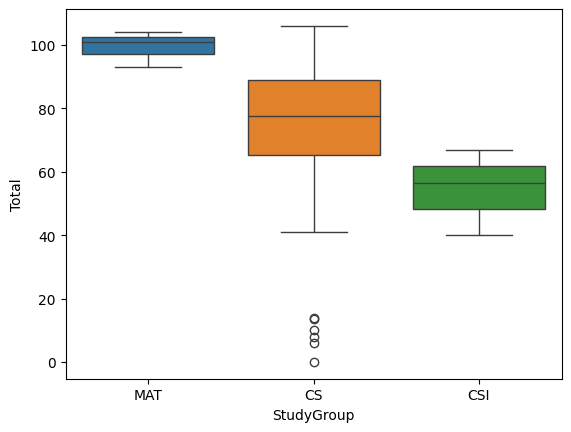

In [18]:
sns.boxplot(data=df, y="Total", x="StudyGroup", hue="StudyGroup")

Here we can plot the TotalPoints in relation to StudyGroup, what can we say about the data ?

- The MAT students had the most points at the course, all of them was around the maximum value. What can we say about the MAT students here ?
  
- Some CS students failed this course, looking on the outliers, I would say that students having 0 points were not attending the lectures.
  
- Looking at the CSI students, they were able to accumulate far fewer points, some of them failed the course, even when they attended the lectures. I think that the course is probably hard for the CSI students.

We can see some interesting insights and create hypothesis only by looking at the plot, we can further enhance this by using the numbers in the descriptions.

<Axes: xlabel='TasksTotal', ylabel='Total'>

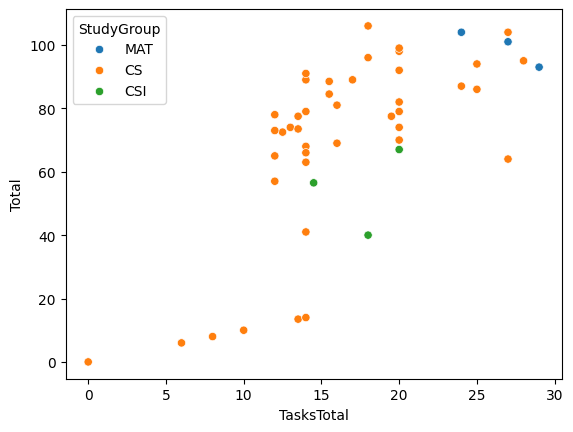

In [20]:
sns.scatterplot(data=df, x="TasksTotal", y="Total", hue="StudyGroup")

Interesting insights for me are the CSI students, why did someone fail the course and why they were able to accumulate far fewer points then the other study groups?

- Only 3 students from the CSI are attending the course
  
- All the CSI students successfully passed the section for tasks from lectures, they had more points than the median (13.5 points), so this section was not an issue
  
- The guy who failed the course had almost maximum points

### Plot for other sections
Since you probably understand what is the EDA (Exploratory Data Analysis) about, I won't create descriptions for the plots below.

<Axes: xlabel='EDA_CLU', ylabel='Total'>

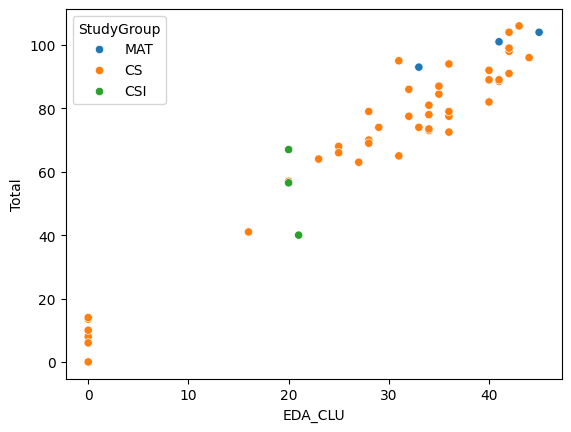

In [21]:
sns.scatterplot(data=df, x="EDA_CLU", y="Total", hue="StudyGroup")

***Insert your insights***

<Axes: xlabel='CLS', ylabel='Total'>

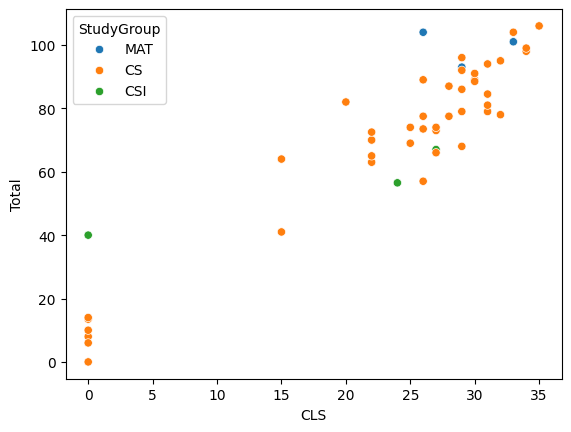

In [22]:
sns.scatterplot(data=df, x="CLS", y="Total", hue="StudyGroup")